In [ ]:
# First Machine Learning Project
# use a database of used cars to train a model which will predict
# the price of a used car given its relevant features

In [ ]:
# download the dataset (from kaggle)

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

dataset = 'austinreese/craigslist-carstrucks-data'  
download_path = './datasets'   
api.dataset_download_files(dataset, path=download_path, unzip=True)

In [1]:
# load the data into a dataframe

In [2]:
import os
import pandas as pd

filename = 'vehicles.csv'
vehicles = pd.read_csv(os.path.join('./datasets', filename))

In [3]:
vehicles

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
# get basic information about the data

In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
vehicles.year.sort_values(ascending=False).head(5)

337566    2022.0
223774    2022.0
43183     2022.0
372603    2022.0
93885     2022.0
Name: year, dtype: float64

In [7]:
vehicles.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
352399,7305539550,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,39990,2020.0,acura,mdx sh-awd sport utility,good,6 cylinders,...,NaN,other,white,https://images.craigslist.org/00r0r_cpin64wpXe...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-12T08:11:40-0400
106881,7311939802,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,12550,2018.0,nissan,sentra,NaN,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/01717_6pKzYvTJ1T...,2018 Nissan Sentra SR Offered by: EVERYONE...,NaN,fl,28.567037,-81.291542,2021-04-24T13:17:48-0400
245182,7312008119,https://grandisland.craigslist.org/ctd/d/york-...,grand island,https://grandisland.craigslist.org,27000,2016.0,chevrolet,silverado,NaN,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00H0H_4PMlaWW814...,This Chevrolet Silverado 1500 Crew Cab can be ...,NaN,ne,40.866700,-97.582500,2021-04-24T14:05:33-0500
379430,7315338757,https://odessa.craigslist.org/cto/d/odessa-200...,odessa / midland,https://odessa.craigslist.org,3550,2004.0,chevrolet,NaN,excellent,6 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00c0c_24CxyBFhgf...,2004 Chevy Impala 110 K Really Nice Car Moon R...,NaN,tx,31.851921,-102.354921,2021-05-01T11:15:28-0500
327974,7312871899,https://altoona.craigslist.org/ctd/d/altoona-2...,altoona-johnstown,https://altoona.craigslist.org,34990,2018.0,jeep,wrangler unlimited all new,good,NaN,...,NaN,other,NaN,https://images.craigslist.org/00o0o_iP6TkKggsW...,Carvana is the safer way to buy a car During t...,NaN,pa,40.500000,-78.400000,2021-04-26T12:50:55-0400


Text(0, 0.5, 'Count')

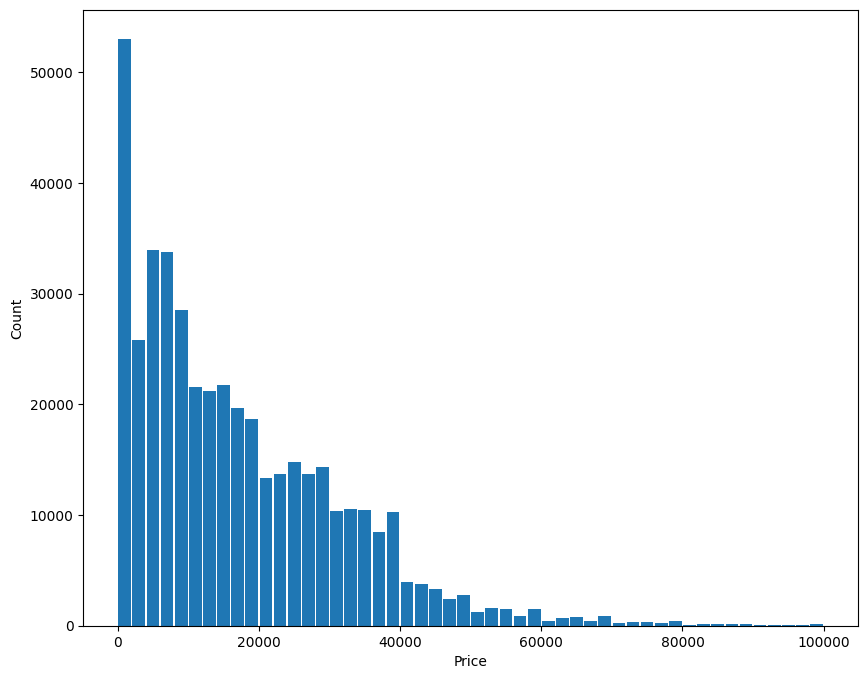

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.hist(vehicles.price, bins=50, range=(0,100000), rwidth=0.9);
plt.xlabel("Price")
plt.ylabel("Count")

In [9]:
vehicles[vehicles.price <= 1000].shape

(47524, 26)

In [10]:
# lets remove rows with label less than 1000 and more than 100000
# less than 1000 label will be rough, uneven and random, more than 100000 data is very less 
vehicles = vehicles[(vehicles.price > 1000) & (vehicles.price < 100000)]
vehicles.shape

(378659, 26)

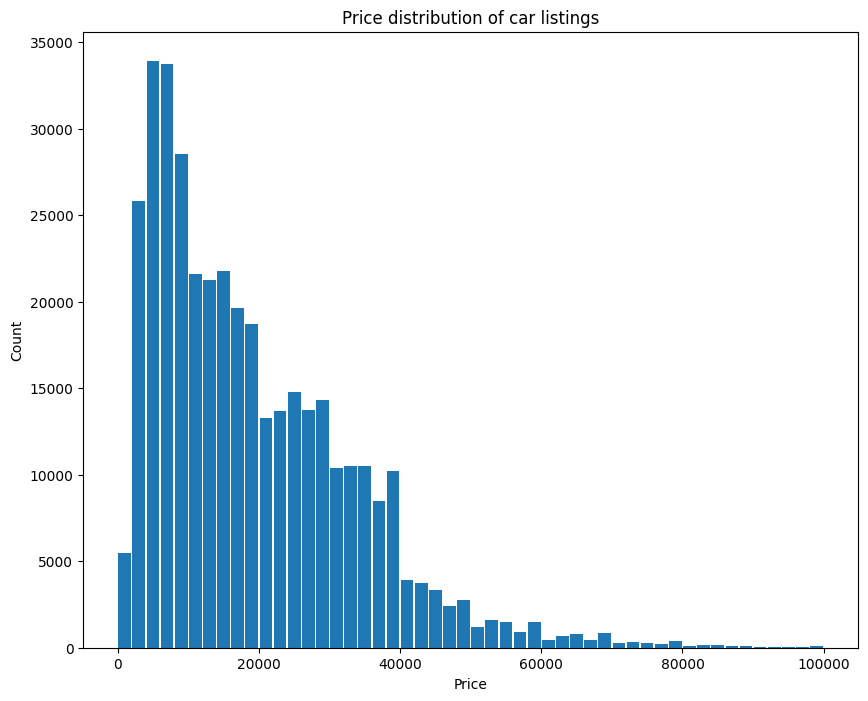

In [11]:
plt.figure(figsize=(10,8))
plt.title("Price distribution of car listings")
plt.hist(vehicles.price, bins=50, range=(0,100000), rwidth=0.9);
plt.xlabel("Price")
plt.ylabel("Count");

In [12]:
# Split between train and test set

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(vehicles, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

(302927, 26)
(75732, 26)


In [13]:
# Visualize the data to get insights

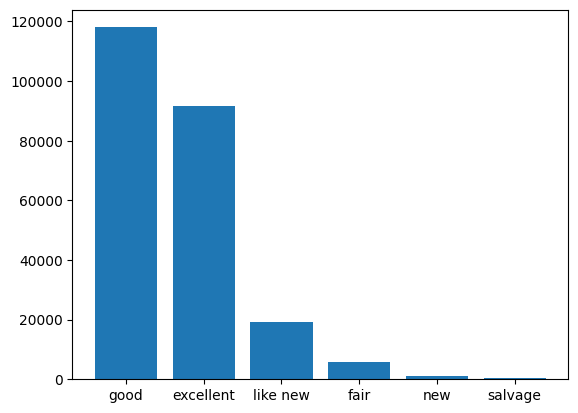

In [14]:
counts = vehicles['condition'].value_counts()
plt.bar(counts.index, counts.values);

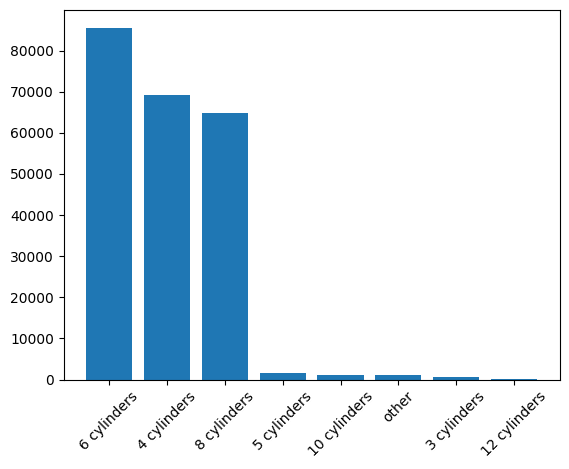

In [15]:
cylinders = vehicles['cylinders'].value_counts()
plt.bar(cylinders.index, cylinders.values)
plt.xticks(rotation=45);

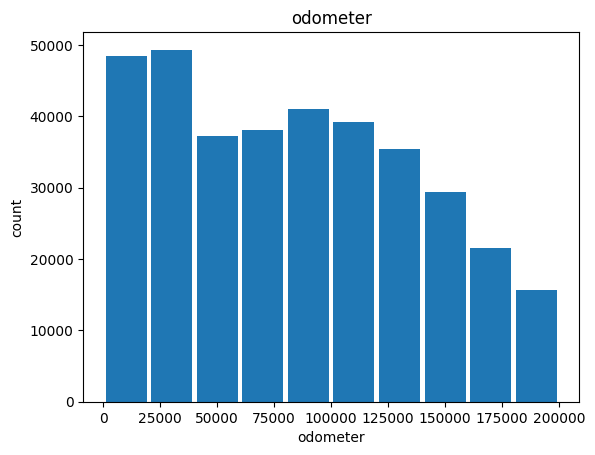

In [16]:
plt.title("odometer")
plt.xlabel("odometer")
plt.ylabel("count")
plt.hist(vehicles.odometer, range=(0, 200000), rwidth=0.9);

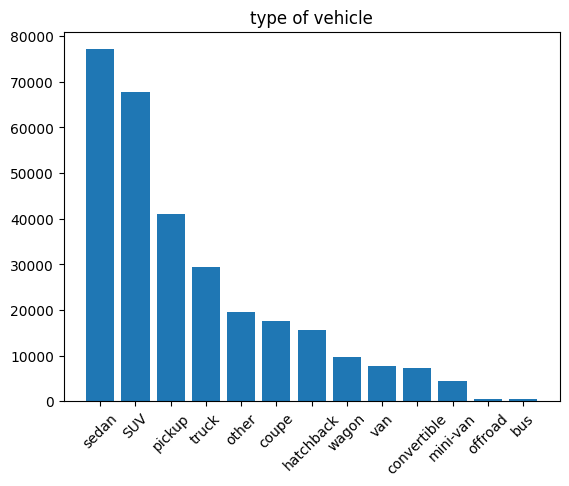

In [17]:
typ = vehicles['type'].value_counts()
plt.title("type of vehicle")
plt.bar(typ.index, typ.values)
plt.xticks(rotation=45);

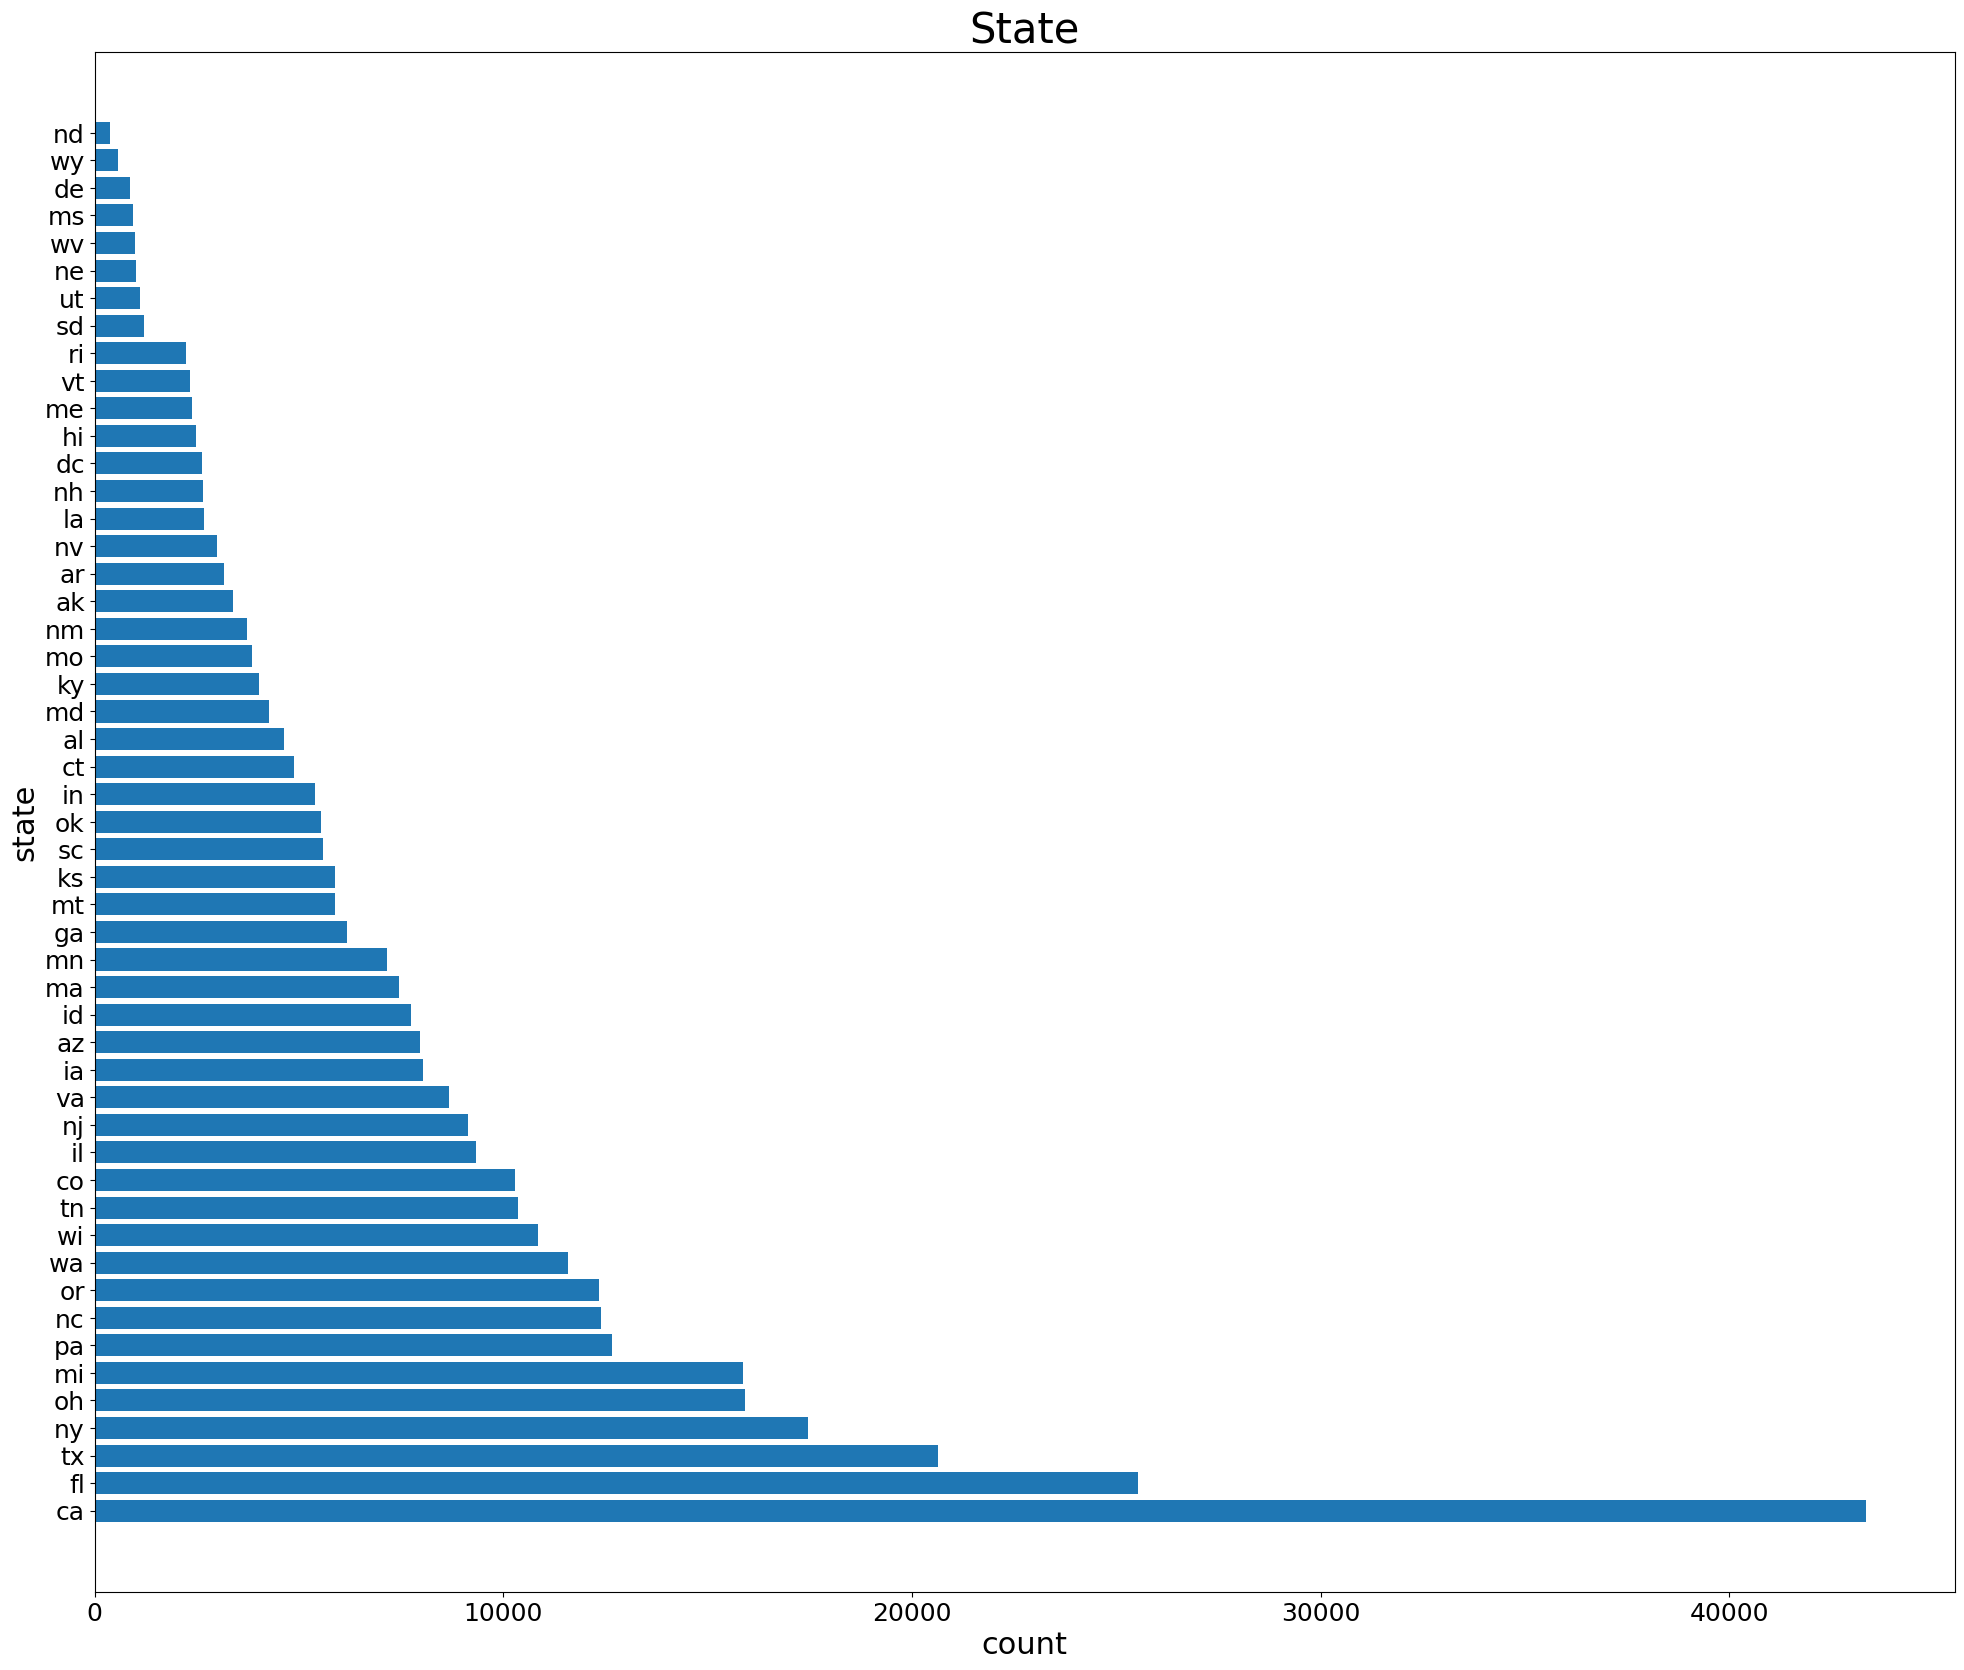

In [18]:
state = vehicles['state'].value_counts()
plt.figure(figsize=(24,20))
plt.title("State", fontsize=30)
plt.barh(state.index, state.values, linewidth=5)
plt.xlabel("count", fontsize=22)
plt.ylabel("state", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

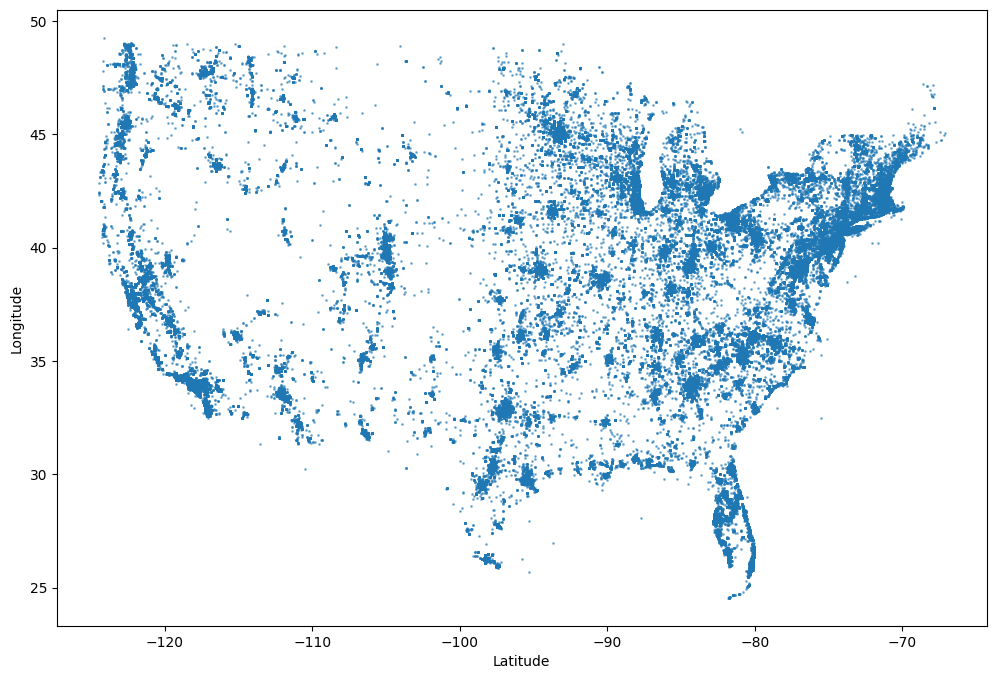

In [19]:
lat_range = (24.5, 49.5)
long_range = (-125, -66.9)

vehicles_mainland = vehicles[
    (vehicles['lat'] >= lat_range[0]) & (vehicles['lat'] <= lat_range[1]) &
    (vehicles['long'] >= long_range[0]) & (vehicles['long'] <= long_range[1])
]
plt.figure(figsize=(12, 8))
plt.scatter(y=vehicles_mainland['lat'], x=vehicles_mainland['long'], s=1, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude");

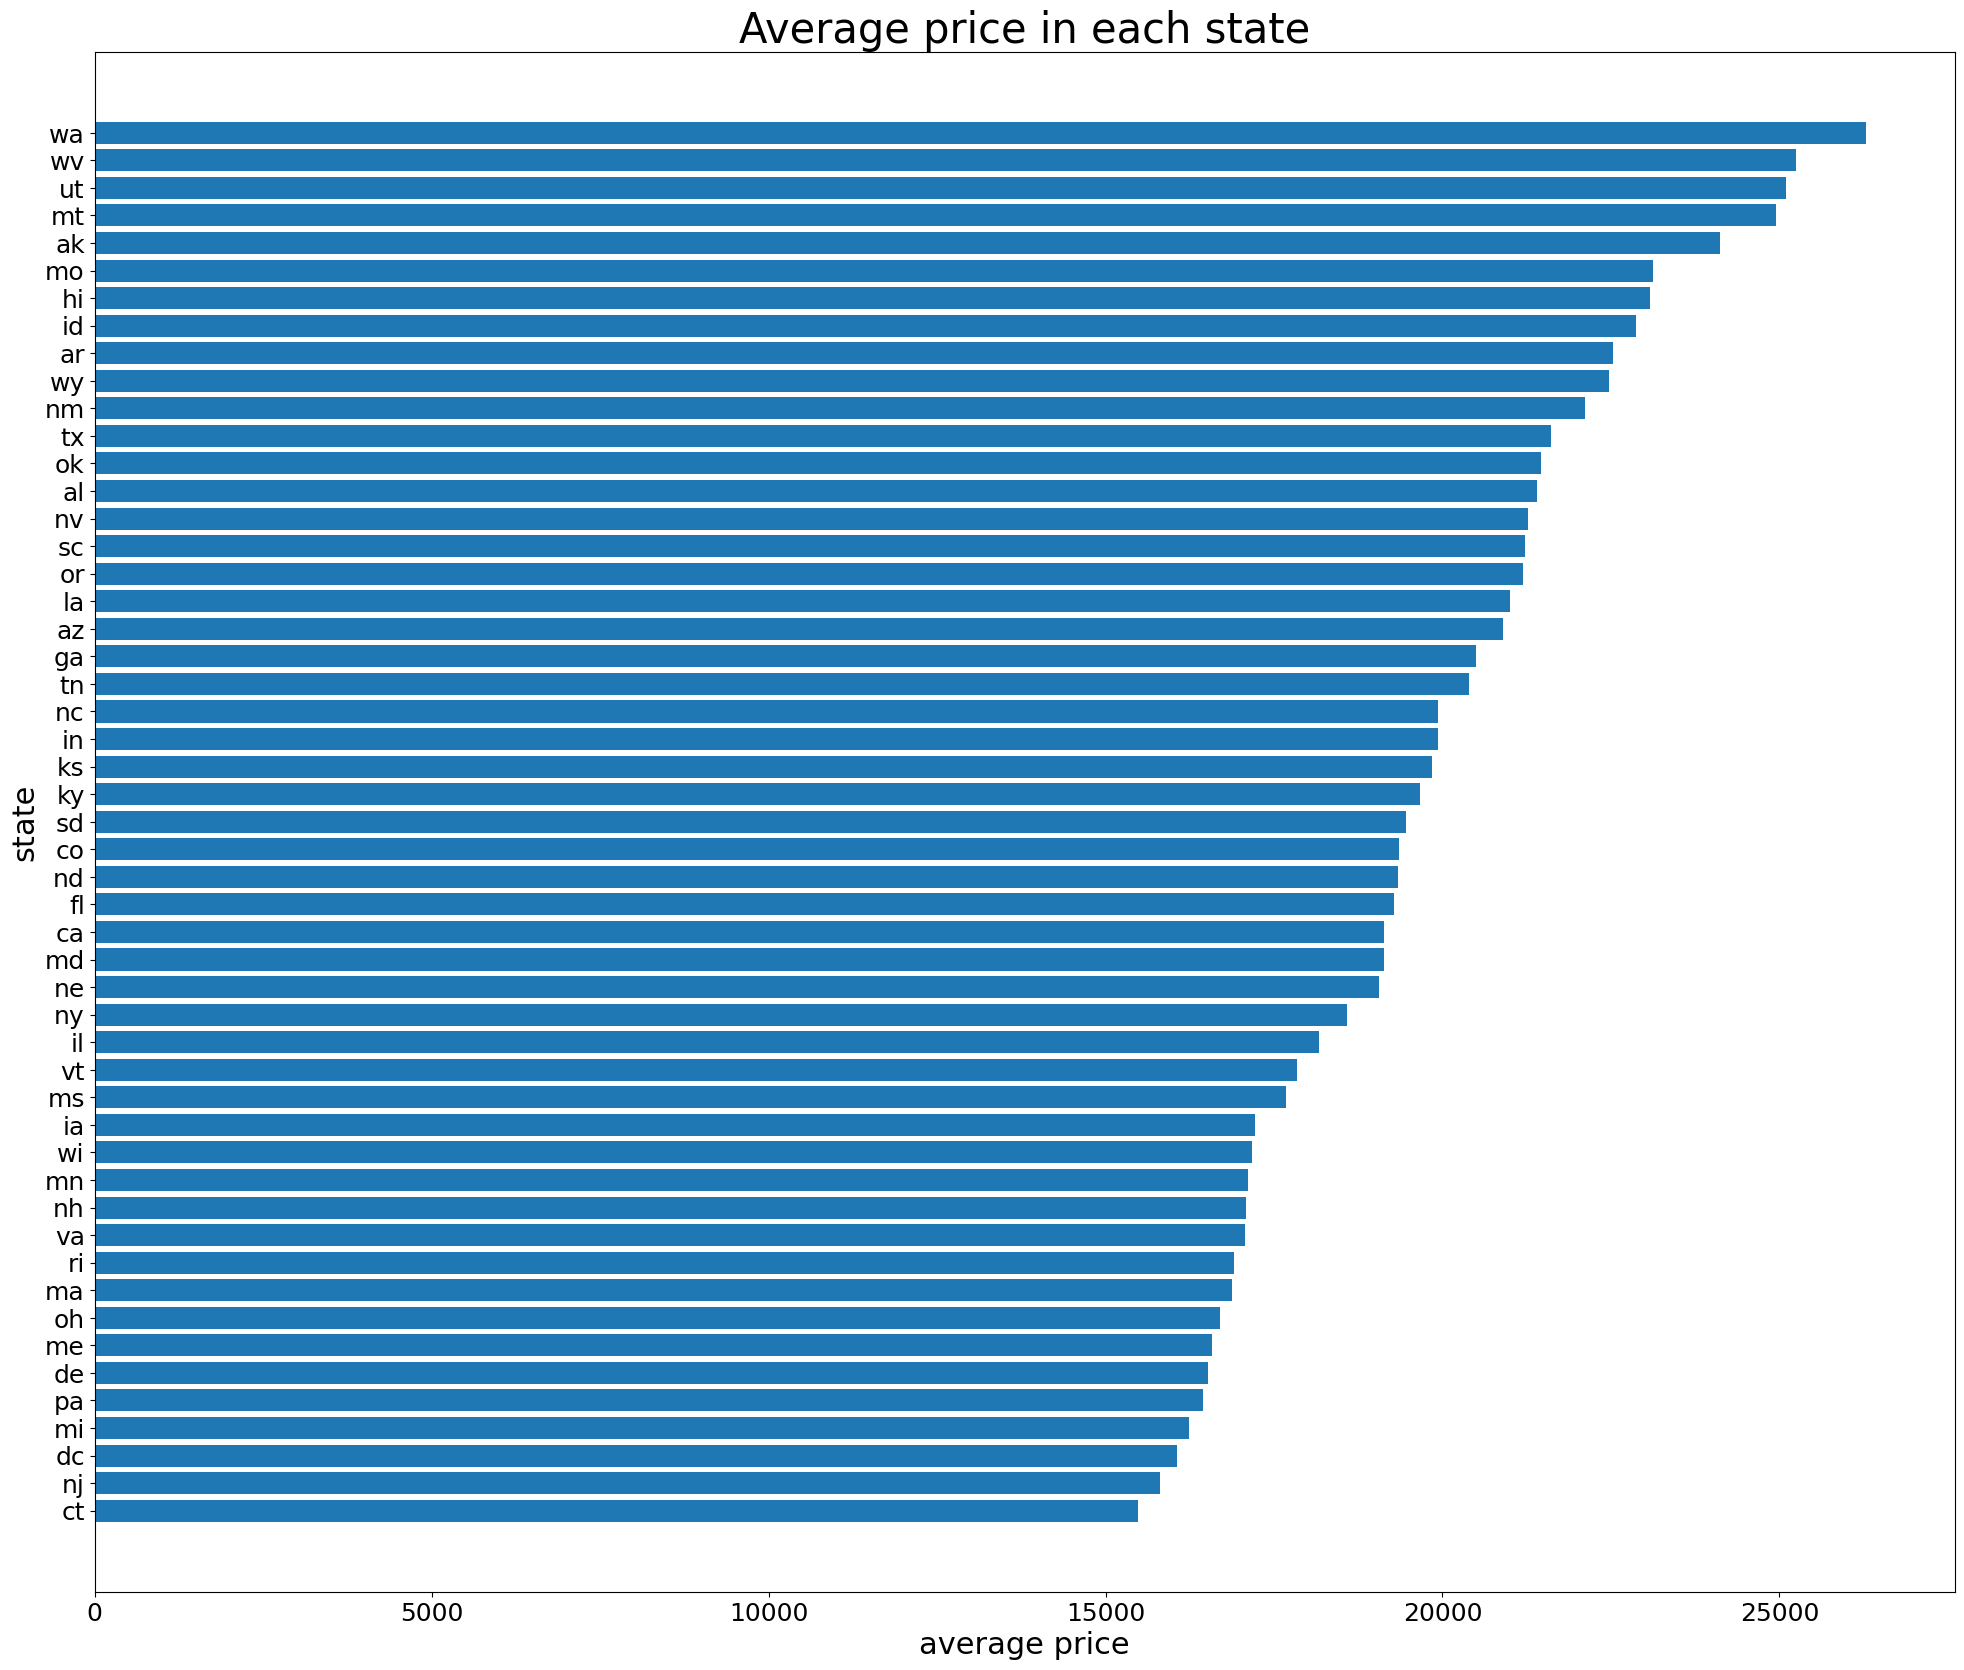

In [20]:
state_average_price = vehicles.groupby('state')['price'].sum() / vehicles.groupby('state').size()
state_average_price.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(24,20))
plt.title("Average price in each state", fontsize=30)
plt.barh(state_average_price.index, state_average_price.values, linewidth=5)
plt.xlabel("average price", fontsize=22)
plt.ylabel("state", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [21]:
state_count = vehicles.groupby('state').size()
state_average_price = vehicles.groupby('state')['price'].sum() / vehicles.groupby('state').size()
state_count.corr(state_average_price)

np.float64(-0.1300577453314096)

In [22]:
# So here, -0.17 indicates a weak negative relationship between
# number of cars listed and average price of car for each state

# lets check for more correlations

In [23]:
corr_matrix = vehicles.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price       1.000000
year        0.366477
lat        -0.005415
id         -0.071926
long       -0.097435
odometer   -0.198336
county           NaN
Name: price, dtype: float64

In [24]:
# we can see that price is somewhat corelated with the year of production
# i.e. newer models are more expensive which is an expected corelation
# also price has weak negative coorelation with odometer which is resonable

In [25]:
# Prepare the data for ML algorithm (train set)

In [26]:
# separate predictors and labels from the train set
vehicles = train_set.drop("price", axis=1) # predictors
vehicles_labels = train_set["price"].copy() #labels

In [27]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302927 entries, 420795 to 138028
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            302927 non-null  int64  
 1   url           302927 non-null  object 
 2   region        302927 non-null  object 
 3   region_url    302927 non-null  object 
 4   year          301981 non-null  float64
 5   manufacturer  291087 non-null  object 
 6   model         299476 non-null  object 
 7   condition     188732 non-null  object 
 8   cylinders     179204 non-null  object 
 9   fuel          300886 non-null  object 
 10  odometer      301280 non-null  float64
 11  title_status  297683 non-null  object 
 12  transmission  301462 non-null  object 
 13  VIN           187187 non-null  object 
 14  drive         211323 non-null  object 
 15  size          85144 non-null   object 
 16  type          238385 non-null  object 
 17  paint_color   216432 non-null  object 
 18  imag

In [28]:
# removing unnecessary attributes
vehicles.drop(['id', 'url', 'region', 'region_url', 'VIN', 'size', 'image_url', 'description', 'county', 'posting_date', 'state', 'paint_color', 'lat', 'long'], axis=1, inplace=True)

In [29]:
list(vehicles)

['year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'type']

In [30]:
vehicles

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
420795,2009.0,ford,crown victoria police,excellent,8 cylinders,gas,53278.0,clean,automatic,rwd,sedan
98488,2019.0,honda,ridgeline sport pickup 4d,good,NaN,other,23645.0,clean,other,NaN,pickup
280252,2017.0,bmw,x5 xdrive35i sport utility,good,NaN,other,74108.0,clean,automatic,NaN,SUV
267974,2014.0,toyota,prius c four hatchback 4d,good,NaN,other,71677.0,clean,other,fwd,hatchback
356421,2019.0,chevrolet,silverado 2500,NaN,NaN,diesel,34195.0,clean,automatic,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
289570,2013.0,mazda,mazda3,good,4 cylinders,gas,77096.0,clean,automatic,fwd,sedan
413333,2018.0,gmc,savana cargo van,NaN,8 cylinders,gas,18921.0,clean,automatic,rwd,van
149162,2016.0,ford,super duty f-550 drw,good,8 cylinders,diesel,40193.0,clean,automatic,4wd,NaN
165117,2007.0,ford,f-150,good,8 cylinders,gas,152415.0,clean,automatic,rwd,truck


In [31]:
# We perform following transformation for the columns:
# 1. Imputation (all columns, numeric->median, categorical->constant)
# 2. Encoding (categorical columns, types: ordinal, one hot, mean target)

In [32]:
# separate into two dataframes, one for numeric values, other for categorical values
vehicles_num = vehicles[['year', 'odometer']] 
vehicles_cat = vehicles[['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                         'transmission', 'title_status', 'drive', 'type']]  

# all pipelines are in pipelines folder
from pipelines.num_pipeline import num_pipeline
from pipelines.cat_pipeline import cat_pipeline

X_num = num_pipeline.fit_transform(vehicles_num)
X_cat = cat_pipeline.fit_transform(vehicles_cat, vehicles_labels)

In [33]:
import numpy as np

ct = cat_pipeline.named_steps['encoder']
ohe = ct.named_transformers_['one_hot_encoder']
ohe_feature_names = ohe.get_feature_names_out()

mean_cols = [0, 1]
ordinal_col_1 = [2]
ordinal_col_2 = [3]
one_hot_cols = [4, 5, 6, 7, 8]

cols = (list(vehicles_num) + 
           list(vehicles_cat.iloc[:, mean_cols]) + 
           list(vehicles_cat.iloc[:, ordinal_col_1]) + 
           list(vehicles_cat.iloc[:, ordinal_col_2]) +
           list(ohe_feature_names)
          )

X_df = pd.DataFrame(np.concatenate((X_num, X_cat), axis=1), columns=cols)

In [34]:
X_df

,year,odometer,manufacturer,model,condition,cylinders,x0_diesel,x0_electric,x0_gas,x0_hybrid,...,x4_hatchback,x4_mini-van,x4_missing,x4_offroad,x4_other,x4_pickup,x4_sedan,x4_truck,x4_van,x4_wagon
0,-0.211885,-0.248467,0.405904,-0.255560,1.646369,1.747613,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.837997,-0.413783,0.491776,-0.518970,-0.232463,-0.566516,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.628021,-0.132261,0.572675,-0.502169,-0.232463,-0.566516,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.313056,-0.145823,-0.455574,-1.416430,-0.232463,-0.566516,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837997,-0.354927,-0.130206,0.637577,-0.858740,-0.566516,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302922,0.208068,-0.115592,-2.922110,-0.234348,-0.232463,-1.145048,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
302923,0.733009,-0.440137,-1.468631,1.721422,-0.858740,1.747613,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
302924,0.523033,-0.321465,0.405904,0.025240,-0.232463,1.747613,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302925,-0.421861,0.304596,0.405904,-0.033300,-0.232463,1.747613,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
# removing less important features after checking feature importance in the future
X_df = X_df[["year", "odometer", "cylinders", "manufacturer", "model", "condition", "x0_diesel", "x0_gas", "x1_automatic", "x1_manual", "x3_fwd", "x3_4wd", "x3_rwd", "x4_pickup", "x4_sedan", "x4_SUV"]]

In [36]:
# dataframe memory/size in mb
X_df.memory_usage(deep=True).sum() / 1024 ** 2

np.float64(36.978519439697266)

In [37]:
# lets save the transformation pipelines which are fitted with the data, we will need them in the microservice to transform user's data 
# deploy our model as a microservice

import joblib

joblib.dump(num_pipeline, "num_pipeline.pkl")
joblib.dump(cat_pipeline, "cat_pipeline.pkl")

['cat_pipeline.pkl']

In [38]:
# train the model

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model_1 = DecisionTreeRegressor()
model_1.fit(X_df, vehicles_labels)

vehicles_predictions_1 = model_1.predict(X_df)
model_1_mse = mean_squared_error(vehicles_labels, vehicles_predictions_1)
model_1_rmse = np.sqrt(model_1_mse)
model_1_rmse

np.float64(303.0929334495989)

In [40]:
# overfitting

In [41]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()
model_2.fit(X_df, vehicles_labels)

vehicles_prediction_2 = model_2.predict(X_df)
model_2_mse = mean_squared_error(vehicles_labels, vehicles_prediction_2)
model_2_rmse = np.sqrt(model_2_mse)
model_2_rmse

np.float64(11160.625993667845)

In [42]:
# underfitting

In [43]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [44]:
from sklearn.model_selection import cross_val_score

scores_1 = cross_val_score(model_1, X_df, vehicles_labels,
                          scoring="neg_mean_squared_error", cv=10)
scores_rmse_1 = np.sqrt(-scores_1)
display_scores(scores_rmse_1)

Scores:  [6100.15302413 6059.86231147 6091.66775471 6199.87218955 6087.28139534
 6065.38316201 5964.37790512 6232.6943243  6198.92750318 6088.31465346]
Mean:  6108.853422325598
Standard deviation:  76.25977317749485


In [45]:
scores_2 = cross_val_score(model_2, X_df, vehicles_labels,
                          scoring="neg_mean_squared_error", cv=10)
scores_rmse_2 = np.sqrt(-scores_2)
display_scores(scores_rmse_2)

Scores:  [11098.57039973 11059.75203965 11229.35809329 11122.9929894
 11142.83828907 11140.55316267 11037.88526994 11399.17979565
 11067.60087758 11346.33372447]
Mean:  11164.50646414368
Standard deviation:  116.5546101783228


In [46]:
# overall results

#                       decision tree          linear reg
# trained data          303                    11100
# new data              6118                   11100

# conclusion: 
# linear reg is neither underfitting nor overfitting but bad prediction
# decision tree is overfitting but better performance than linear reg

In [47]:
# lets test a more complex and advanced model: random forest 

In [48]:
from sklearn.ensemble import RandomForestRegressor
import joblib

model_3 = RandomForestRegressor(n_jobs=-1)
model_3.fit(X_df, vehicles_labels)

joblib.dump(model_3, "model_forest.pkl")

['model_forest.pkl']

In [49]:
import joblib
from sklearn.metrics import mean_squared_error

model_forest = joblib.load("model_forest.pkl")

vehicles_prediction_3 = model_forest.predict(X_df)
model_3_mse = mean_squared_error(vehicles_labels, vehicles_prediction_3)
model_3_rmse = np.sqrt(model_3_mse)
model_3_rmse

np.float64(1691.5441635824454)

In [50]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

scores_3 = cross_val_score(model_forest, X_df, vehicles_labels,
                        scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

scores_rmse_3 = np.sqrt(-scores_3)
display_scores(scores_rmse_3)

Scores:  [4551.7504533  4645.0774795  4616.97274508 4654.94135317 4678.50509428]
Mean:  4629.449425066883
Standard deviation:  43.57368683495554


In [51]:
# overall results

#                                 linear reg      decision tree     random forest
# trained data                    12300           442               1684
# new data (cross validation)     12300           7678              4627

In [114]:
# we have already got hints of overfitting from this analysis of random forest
# which will be useful in model tuning later

In [115]:
import joblib

model_forest = joblib.load("model_forest.pkl")
some_data = X_df[:5]
some_labels = vehicles_labels[:5]
some_predictions = model_forest.predict(some_data)
print(np.c_[some_predictions, some_labels])

[[12450.09   11980.    ]
 [30590.     30590.    ]
 [28590.     28590.    ]
 [14590.     14590.    ]
 [54554.2895 54464.    ]]


In [116]:
# Fine tune your model
# we use Coarse-to-fine search
# Start with a broad, coarse search over wide ranges of hyperparameters to locate promising regions, using Randomized search
# then perform a narrow, fine search around the best values to precisely optimize the model, using Grid search

In [117]:
# we already know that our model is overfitting so for randomized search we use ranges 
# of params which can control overfitting 

In [118]:
# Randomized search

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# param distributions considering overfitting
param_distributions = {
    'n_estimators': [30, 70, 100],          
    'max_depth': [10, 20, 30],             
    'min_samples_split': [10, 20, 40],         
    'min_samples_leaf': [5, 10, 30],           
    'max_features': [0.3, 0.5, 'sqrt'],    
    'bootstrap': [True]               
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=25, # 25 random parameter combination among 243 possible combinations (10%)
    scoring='neg_mean_squared_error', 
    cv=3,                  
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_df, vehicles_labels)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-random_search.best_score_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'n_estimators': 30, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 20, 'bootstrap': True}
Best Score (RMSE): 5380.319176520105


In [125]:
# Best Parameters: {'n_estimators': 30, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 20, 'bootstrap': True}
# Best Score (RMSE): 5380.319176520105

# the best paramters obtained using random search give rmse of 5380 which is even worse than before (4627)  
# but we cannot stick to default params just because they give better score because they also overfit
# but we do have one more thing to do: 
# grid search with data near the best parameters to possibly find even better data 

In [126]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df['RMSE'] = np.sqrt(-results_df['mean_test_score'])
results_df.sort_values('RMSE').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,RMSE
22,29.484961,1.638372,5.554691,2.338387,30,10,5,0.5,20,True,"{'n_estimators': 30, 'min_samples_split': 10, ...",-2.841465e+07,-2.903086e+07,-2.939799e+07,-2.894783e+07,405720.021038,1,5380.319177
9,92.949646,0.828729,9.656162,0.256007,100,20,5,0.5,20,True,"{'n_estimators': 100, 'min_samples_split': 20,...",-2.942153e+07,-3.017377e+07,-3.063512e+07,-3.007681e+07,500167.442813,2,5484.232958
14,53.742702,3.728231,9.907685,2.146213,70,10,5,0.3,20,True,"{'n_estimators': 70, 'min_samples_split': 10, ...",-3.139408e+07,-3.210534e+07,-3.245599e+07,-3.198514e+07,441775.435085,3,5655.540533


In [123]:
# we do grid search with values near those parms which give good result and help generalization and control overfitting

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_grid = RandomForestRegressor(random_state=42, n_jobs=8)

param_grid = {
    'n_estimators': [30, 50],
    'max_depth': [20],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10],
    'max_features': [0.5, 0.3],
    'bootstrap': [True]
}

grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_df, vehicles_labels)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-grid_search.best_score_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
Best Score (RMSE): 5358.638176496469


In [53]:
# Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
# Best Score (RMSE): 5358.638176496469
# not much of a difference than without any hyperparameter tuning but we this is with params better for generalization and controlling overfitting  

In [54]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df['RMSE'] = np.sqrt(-results_df['mean_test_score'])
top_results = results_df.sort_values('RMSE').head(6)
top_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,RMSE
1,79.614531,2.597931,4.079328,0.250270,True,20,0.5,5,10,50,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",-2.814866e+07,-2.880274e+07,-2.919360e+07,-2.871500e+07,431082.334983,1,5358.638176
0,30.913264,15.220226,2.954624,0.232357,True,20,0.5,5,10,30,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",-2.841465e+07,-2.903086e+07,-2.939799e+07,-2.894783e+07,405720.021038,2,5380.319177
3,79.614174,2.367218,3.449717,0.513816,True,20,0.5,5,15,50,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",-2.881168e+07,-2.933277e+07,-2.987259e+07,-2.933901e+07,433134.398460,3,5416.550065
2,41.813332,10.061603,3.755942,0.437401,True,20,0.5,5,15,30,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",-2.897775e+07,-2.958347e+07,-3.006081e+07,-2.954068e+07,443193.170901,4,5435.133695
5,16.752982,1.232749,1.390682,0.303799,True,20,0.5,5,20,50,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",-2.955626e+07,-3.029645e+07,-3.077580e+07,-3.020950e+07,501656.462555,5,5496.317241
4,51.139309,6.254856,3.281700,0.233859,True,20,0.5,5,20,30,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",-2.973716e+07,-3.044459e+07,-3.101393e+07,-3.039856e+07,522253.546839,6,5513.488808


In [55]:
# the top 6 combinations all have very close score. we choose the one which has best parameters for generalization and controlling overfitting
# the param combination of rank 6 is the best option considering all that
# it has only 155 more score but n_estimator is jus 30 which helps to reduce model size and nim_samples_split is 15 i.e. higher better for overfitting

In [56]:
from sklearn.ensemble import RandomForestRegressor
import joblib

params = top_results[top_results.rank_test_score == 6]["params"].iloc[0]
model_best = RandomForestRegressor(**params, n_jobs=1)
model_best.fit(X_df, vehicles_labels)

joblib.dump(model_best, "model_forest_best.pkl")

['model_forest_best.pkl']

In [142]:
# lets calculate another index called Mean Absolute Error (MAE) which shows the average error in the prediction by the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(**params, n_jobs=-1)

mae_scores = cross_val_score(rf, X_df, vehicles_labels, 
                             cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

mae_scores = -mae_scores

# Calculate mean MAE
mean_mae = mae_scores.mean()

print(f"MAE scores for each fold: {mae_scores}")
print(f"Mean MAE: {mean_mae}")

MAE scores for each fold: [3105.30679977 3130.27693607 3118.24915494 3130.99651958 3129.53360143]
Mean MAE: 3122.8726023590943


In [143]:
# so when we ran cross validation test on our best model, we found
# rmse: 5513
# mae: 3122

In [144]:
# let look at how important each feature is for our model
# if there are too many columns with very less importance, it is best to go back and remove them and run everything once again
import joblib

model_best = joblib.load("model_forest_best.pkl")

feature_importances = model_best.feature_importances_
pd.DataFrame({
    'column': list(X_df),
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

,column,importance
0,year,0.347567
1,odometer,0.234426
6,x0_diesel,0.080973
2,cylinders,0.070124
10,x3_fwd,0.058271
3,manufacturer,0.046597
4,model,0.038404
11,x3_4wd,0.034296
7,x0_gas,0.028467
5,condition,0.017103


In [145]:
# finally, test it on test set

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

final_model = model_best

X_test = test_set.drop("price", axis=1) 
y_test = test_set["price"].copy()

X_test_num = X_test[['year', 'odometer']] 
X_test_cat = X_test[['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                         'transmission', 'title_status', 'drive', 'type']]  

X_test_num_tr = num_pipeline.fit_transform(X_test_num)
X_test_cat_tr = cat_pipeline.fit_transform(X_test_cat, y_test)

ct_test = cat_pipeline.named_steps['encoder']
ohe_test = ct_test.named_transformers_['one_hot_encoder']
ohe_feature_names_test = ohe_test.get_feature_names_out()

cols_test = (list(X_test_num) + 
           list(X_test_cat.iloc[:, mean_cols]) + 
           list(X_test_cat.iloc[:, ordinal_col_1]) + 
           list(X_test_cat.iloc[:, ordinal_col_2]) +
           list(ohe_feature_names_test)
          )

X_test_prepared = pd.DataFrame(np.concatenate((X_test_num_tr, X_test_cat_tr), axis=1), columns=cols_test)
X_test_prepared = X_test_prepared[["year", "odometer", "cylinders", "manufacturer", "model", "condition", "x0_diesel", "x0_gas", "x1_automatic", "x1_manual", "x3_fwd", "x3_4wd", "x3_rwd", "x4_pickup", "x4_sedan", "x4_SUV"]]

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_predictions)
print(f"RMSE: {final_rmse}")
print(f"MAE: {final_mae}")

RMSE: 7415.289625344977
MAE: 4883.234191845096


In [146]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([7324.5250584 , 7504.95657045])

In [38]:
# our model performed 1.34X worse rmse and 1.56x worse mae on test set compared to cross validation, which is kinda normal
# (this final model is obtained after removing half of least important features and changeing hyperparameter to more generalize)
# although raw numbers are slightly better on previous ones, this one is more generalized and less overfit so better

In [147]:
# model final result
#                               rmse                             mae
# cv test                      5513                             3122
# test set                     7415                             4883

In [148]:
import joblib

some_indices = np.random.randint(0, len(X_test_prepared), 10) 
some_data = X_test_prepared.iloc[some_indices]
some_labels = y_test.iloc[some_indices]

model = joblib.load("model_forest_best.pkl")
some_predictions = model.predict(some_data)

pd.DataFrame({
    "predictions": some_predictions.astype(int),
    "labels": some_labels,
    "error": some_predictions.astype(int) - some_labels,
    "percent_error": (abs(some_predictions.astype(int) - some_labels) / some_labels) * 100
})

,predictions,labels,error,percent_error
41445,19250,20000,-750,3.750000
44180,6395,6899,-504,7.305407
183272,9619,4000,5619,140.475000
56678,10854,5750,5104,88.765217
34363,11444,12995,-1551,11.935360
121855,16349,15590,759,4.868505
90600,8824,9500,-676,7.115789
21332,28650,23590,5060,21.449767
408390,40229,39999,230,0.575014
299545,42171,40590,1581,3.895048


In [ ]:
# be proud of yourself child. thats progress. thats what you want and thats what you should go for in life.